/var/folders/bw/2cm4rnhn0djgg95n4py1pysc0000gp/T/ipykernel_67971/3245094741.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, i].set_xticklabels(sizes)
/var/folders/bw/2cm4rnhn0djgg95n4py1pysc0000gp/T/ipykernel_67971/3245094741.py:71: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, i].set_xticklabels(sizes)


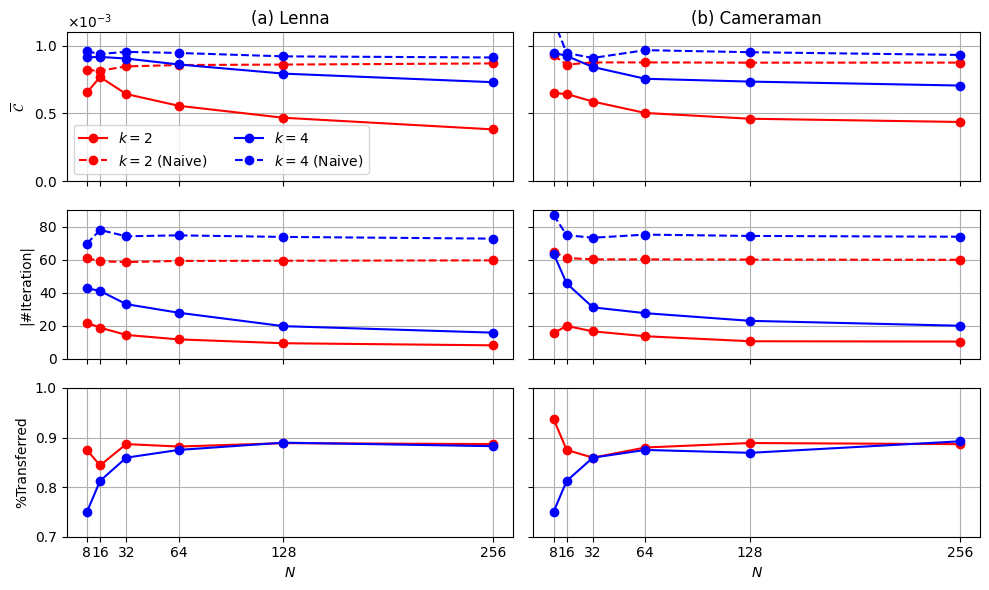

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import ScalarFormatter


fig, axs = plt.subplots(3, 2, figsize=(10, 6))



sizes = [8, 16, 32, 64, 128, 256]
ks = [2, 4]
for i, image in enumerate(['lenna.png', 'cameraman.jpg']):
    for k in ks:
        costs_on_sizes_avg = []
        min_steps_on_sizes_avg = []
        costs_on_sizes_avg_naive = []
        min_steps_on_sizes_avg_naive = []
        percent_transfer_on_sizes = []
        for size in sizes:

            min_steps = np.loadtxt(f'./data/{image}_k={k}_size={size}_num_steps_optimal.txt')
            min_steps_on_sizes_avg.append(np.mean(min_steps))
            costs = np.loadtxt(f'./data/{image}_k={k}_size={size}_costs_optimal.txt')
            costs_on_sizes_avg.append(np.mean(costs))
            percent_transfer = np.loadtxt(f'./data/{image}_k={k}_size={size}_percent_transfer_optimal.txt')
            percent_transfer_on_sizes.append(percent_transfer/float(size**2/k**2))
        
            min_steps = np.loadtxt(f'./data/{image}_k={k}_size={size}_num_steps_naive.txt')
            min_steps_on_sizes_avg_naive.append(np.mean(min_steps))
            costs = np.loadtxt(f'./data/{image}_k={k}_size={size}_costs_naive.txt')
            costs_on_sizes_avg_naive.append(np.mean(costs))
            
                   
        
        if k == 2:
            color = 'r'
        else:
            color = 'b'
        axs[0, i].plot(sizes, costs_on_sizes_avg, color , marker = 'o', label=rf'$k = {k}$')
        axs[1, i].plot(sizes, min_steps_on_sizes_avg, color, marker = 'o', label=rf'$k = {k}$')
        axs[2, i].plot(sizes, percent_transfer_on_sizes, color, marker = 'o',label=rf'$k = {k}$')
        
        
        axs[0, i].plot(sizes, costs_on_sizes_avg_naive, color, linestyle = 'dashed', marker = 'o', label=rf'$k = {k}$ (Naive)')
        axs[1, i].plot(sizes, min_steps_on_sizes_avg_naive, color, linestyle='dashed', marker = 'o', label=rf'$k = {k}$ (Naive)')
        #axs[i].plot(sizes, min_steps_on_sizes_std, label=f'k={k}')
        #axs[i].plot(sizes, percent_transfer_on_sizes, label=f'k={k}')
axs[0, 0].set_title('(a) Lenna')
axs[0, 1].set_title('(b) Cameraman')
axs[0, 0].set_ylabel(r'$\overline{\mathcal{C}}$')
axs[1, 0].set_ylabel(r'|#Iteration|')
axs[2, 0].set_ylabel('%Transferred')

for i in [0, 1]:
    axs[0, i].set_xticklabels([])
    axs[1, i].set_xticklabels([])
    axs[2, i].set_xlabel(rf'$N$')
    
    axs[0, i].set_yticks(np.arange(0, 0.0011, 0.0005))
    axs[0, i].set_ylim(0, 0.0011)
    axs[1, i].set_yticks(np.arange(0, 81, 20))
    axs[1, i].set_ylim(0, 90)
    
    axs[0, i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    axs[0, i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axs[2, i].set_ylim(0.7, 1)
    axs[2, i].set_yticks(np.arange(0.7, 1.01, 0.1))
    
    
    axs[2, i].set_xticklabels(sizes)
    for j in range(3):
        axs[j, i].set_xticks(sizes)
        axs[j, i].grid()
axs[0, 1].set_yticklabels([])
axs[1, 1].set_yticklabels([])
axs[2, 1].set_yticklabels([])
axs[0, 0].legend(ncols = 2)
plt.tight_layout()
plt.savefig('images/result2.svg')

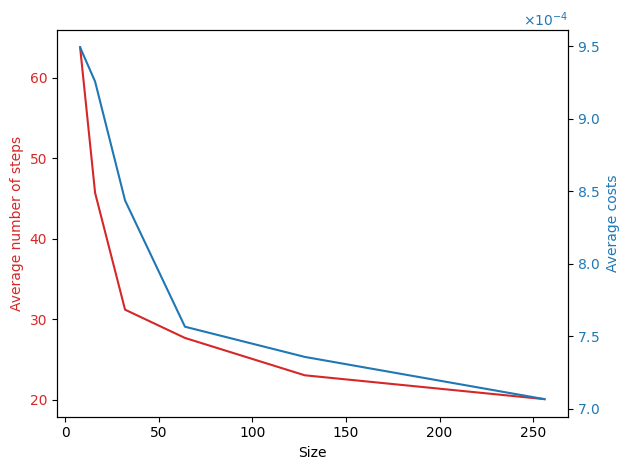

In [45]:
from matplotlib.ticker import ScalarFormatter

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Size')
ax1.set_ylabel('Average number of steps', color=color)
ax1.plot(sizes, min_steps_on_sizes_avg, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Average costs', color=color)  # we already handled the x-label with ax1
ax2.plot(sizes, costs_on_sizes_avg, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Use ScalarFormatter to format the y-axis labels as 10^x
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

